## Sentiment Analysis in Financial Markets
### Exploratory Data Analysis

Analyze news articles, financial reports, or social media to gauge market sentiment. This project would involve natural language processing (NLP) techniques to understand how sentiment affects stock prices.

### Stocks to focus on 

- Tesla (Tsla)

- Apple Inc. (AAPL)

- Amazon.com Inc. (AMZN)

- Alphabet Inc. (GOOGL)

- Microsoft Corporation (MSFT)

- Facebook, Inc. (META)

- JPMorgan Chase & Co. (JPM)

- NVIDIA Corporation (NVDA)


### Textual data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df_text=pd.read_csv('data/textual/df_text.csv', sep=",")
df_text = df_text[['url', 'softTitle','title','date', 'author/1', 'description', 'keywords', 'text']]
df_text = df_text.rename(columns={'author/1': 'author' })

C:\Users\Ethan Vaz Falcao\AppData\Local\Temp\ipykernel_31572\3534584934.py:1: DtypeWarning: Columns (94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df_text=pd.read_csv('data/textual/df_text.csv', sep=",")


In [55]:
df_text['date'].min()

'2008-09-15T07:26:49.000Z'

In [56]:
df_text['date'].max()

'2024-01-08T17:32:11.000Z'

In [57]:
start_date = '2010-01-01'
end_date = '2024-01-01'
df_text = df_text[(df_text['date'] >= start_date) & (df_text['date'] <= end_date)]
df_text.head(3)

,url,softTitle,title,date,author,description,keywords,text
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15T05:00:00.000Z,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29T15:24:00.000Z,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...
2,https://www.cnbc.com/select/best-cash-back-cre...,The best cash-back credit cards of January 2024,The best cash-back credit cards of January 2024,2019-10-15T05:00:00.000Z,"Alexandria White,Jason Stauffer",We analyzed 50 of the most popular cash-back c...,"Select: Credit Cards,Consumer spending,Persona...",Who's this for? The Citi Double Cash® Card is ...


In [58]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10002
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          9770 non-null   object
 1   softTitle    9770 non-null   object
 2   title        9770 non-null   object
 3   date         9770 non-null   object
 4   author       9565 non-null   object
 5   description  9746 non-null   object
 6   keywords     9362 non-null   object
 7   text         9770 non-null   object
dtypes: object(8)
memory usage: 687.0+ KB


In [59]:
df_text.isnull().sum()

url              0
softTitle        0
title            0
date             0
author         205
description     24
keywords       408
text             0
dtype: int64

In [60]:
# Convert date strings to datetime objects
df_text['date'] = pd.to_datetime(df_text['date'])

# Extract the year from the date and count the number of articles per year
articles_per_year = df_text['date'].dt.year.value_counts().sort_index()
articles_per_year

2010       1
2011       3
2012       5
2013       5
2014       4
2015      46
2016     142
2017     231
2018     396
2019     658
2020    1243
2021    1364
2022    2192
2023    3480
Name: date, dtype: int64

Every spike shows that there was a significant  world event

#### Sentiment Distribution

In [70]:
# Import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Ensure there are no NaN values in the 'description' column for sentiment analysis
df_text['description'] = df_text['description'].fillna("")

# Apply VADER to analyze sentiment of each article's description
df_text['Sentiment Scores'] = df_text['description'].apply(lambda x: sia.polarity_scores(x))

# Extract compound scores to determine overall sentiment
df_text['Compound Score'] = df_text['Sentiment Scores'].apply(lambda x: x['compound'])

# Categorize overall sentiment based on compound score
df_text['Overall Sentiment'] = df_text['Compound Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Summary of sentiment distribution
sentiment_distribution = df_text['Overall Sentiment'].value_counts()

sentiment_distribution


[nltk_data] Downloading package vader_lexicon to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive    5363
Neutral     2233
Negative    2174
Name: Overall Sentiment, dtype: int64

https://www.nltk.org/    read this 

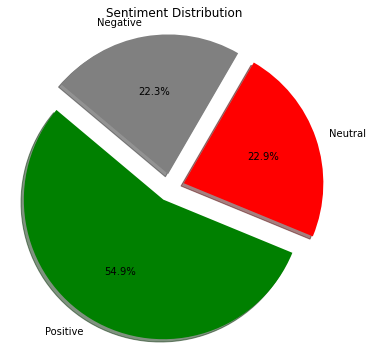

In [71]:
# Plot the sentiment distribution as a pie chart
plt.figure(figsize=(6, 6))
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['green', 'red', 'gray']  # You can choose different colors for the pie slices
explode = (0.1, 0.1, 0.1)  # To explode the slices if needed

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title("Sentiment Distribution")

# Display the pie chart
plt.show()

#### Sentiment Over Time

* -1 indicates extremely negative sentiment.

* 0 indicates neutral sentiment.

* 1 indicates extremely positive sentiment.

c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


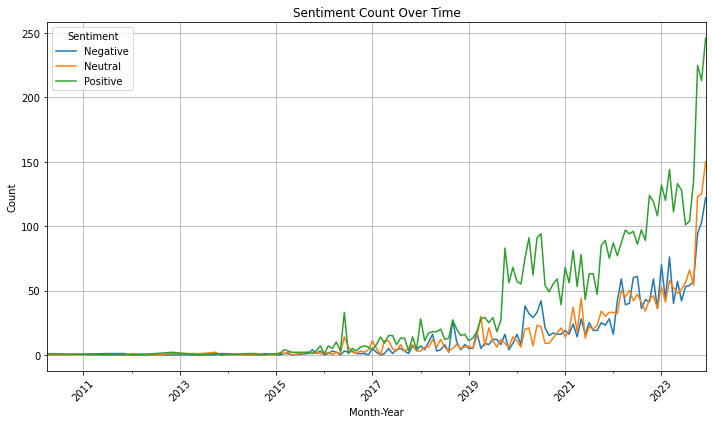

In [77]:
# Create a month-year column for aggregation
df_text['Month-Year'] = df_text['date'].dt.to_period('M')

# Calculate the count of each sentiment category by month
sentiment_over_time = df_text.groupby(['Month-Year', 'Overall Sentiment']).size().unstack(fill_value=0)

sentiment_proportions = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0)

import matplotlib.pyplot as plt

sentiment_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Count Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()



In [50]:
# Filter the DataFrame to only include rows where the Overall Sentiment is Negative
negative_texts = df_text[df_text['Overall Sentiment'] == 'Negative']

# Display the filtered rows
print(negative_texts[['description', 'Overall Sentiment']])


                                            description Overall Sentiment
12    Making a lower down payment lets you put more ...          Negative
14    Extra fees can really add up when it's time to...          Negative
17    Identity theft protection services can alert y...          Negative
54    Yes, you can pay off a personal loan early, bu...          Negative
99    What is debt consolidation? Select defines deb...          Negative
...                                                 ...               ...
9984  Federal Chair Jerome Powell called for more vi...          Negative
9985  Household debt for retirement-age Americans ha...          Negative
9990  After more than a year of gloomy forecasts for...          Negative
9992  Forecasts for a recession have turned to predi...          Negative
9993  Housing supply is low, which is pushing prices...          Negative

[2167 rows x 2 columns]


#### Outliers 

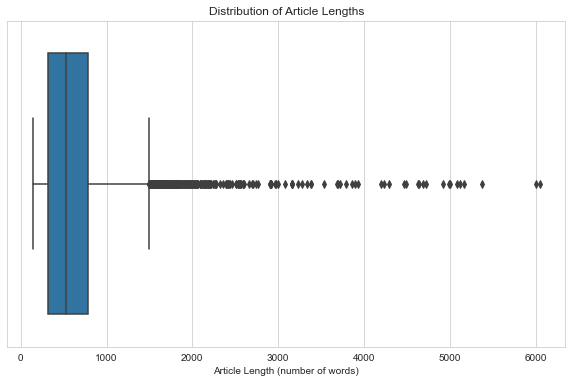

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Analyzing Article Length Outliers
# Box plot for article length
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_text['Article Length'])
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (number of words)')
plt.show()



In [92]:
# Check the correct author column name and process accordingly
if 'author' in df_text.columns:
    # Count the number of articles by each author
    author_distribution = df_text['author'].value_counts()

    # Identify articles with missing author information
    missing_authors = df_text[df_text['author'].isna()]

    # Summary of author distribution and count of articles with missing authors
    author_distribution_summary = author_distribution.describe()
    missing_authors_count = missing_authors.shape[0]
else:
    # If the 'author' column does not exist, set default values to indicate the issue
    author_distribution_summary = "Author column not found."
    missing_authors_count = "Author column not found."

author_distribution_summary, missing_authors_count

(count    1018.000000
 mean        9.395874
 std        33.488363
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         3.000000
 max       361.000000
 Name: author, dtype: float64,
 205)

#### Preparation for Sentiment Analysis

1. Lowercasing.

2. Tokenization

3. Stop Word Removal

4. Lemmatization
5. Removing Special Characters and Numbers

6. Handling Negations

In [96]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for the preprocessing steps
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'\W+|\d+', ' ', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Handling negations could be more complex and context-specific, not covered here
    
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to a sample of the text data
df_text['Processed Description'] = df_text['description'].apply(lambda x: preprocess_text(str(x)))

# Display the original and processed text for comparison
df_text[['description', 'Processed Description']].head()


[nltk_data] Downloading package omw-1.4 to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,description,Processed Description
0,We analyzed 101 balance transfer cards using a...,analyzed balance transfer card using average a...
1,We analyzed 29 credit cards that are marketed ...,analyzed credit card marketed toward consumer ...
2,We analyzed 50 of the most popular cash-back c...,analyzed popular cash back credit card using a...
3,Select analyzed key factors like interest rate...,select analyzed key factor like interest rate ...
4,We analyzed the most popular credit cards avai...,analyzed popular credit card available u open ...


In [97]:
df_text

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,Sentiment Scores,Compound Score,Overall Sentiment,Month-Year,Sentiment Score,Processed Description
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133,"Jason Stauffer,Brett Holzhauer","{'neg': 0.069, 'neu': 0.744, 'pos': 0.187, 'co...",0.6486,Positive,2019-10,0.9995,analyzed balance transfer card using average a...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...,1468,"Benji Stawski,Alexandria White","{'neg': 0.06, 'neu': 0.544, 'pos': 0.396, 'com...",0.9072,Positive,2019-10,0.9999,analyzed credit card marketed toward consumer ...
2,https://www.cnbc.com/select/best-cash-back-cre...,The best cash-back credit cards of January 2024,The best cash-back credit cards of January 2024,2019-10-15 05:00:00+00:00,"Alexandria White,Jason Stauffer",We analyzed 50 of the most popular cash-back c...,"Select: Credit Cards,Consumer spending,Persona...",Who's this for? The Citi Double Cash® Card is ...,1598,"Alexandria White,Jason Stauffer","{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.9366,Positive,2019-10,0.9998,analyzed popular cash back credit card using a...
3,https://www.cnbc.com/select/personal-loan-lend...,Do you need a large personal loan? These lende...,Do you need a large personal loan? These lende...,2022-05-06 19:12:25+00:00,Jasmin Suknanan,Select analyzed key factors like interest rate...,"Select_Monetized,Consumer spending,Personal fi...",Personal loans are a common way to pay for lar...,1035,Jasmin Suknanan,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.6705,Positive,2022-05,0.9981,select analyzed key factor like interest rate ...
4,https://www.cnbc.com/select/best-credit-card-s...,The best credit card sign-up bonuses of Januar...,The best credit card sign-up bonuses of Januar...,2019-11-12 19:30:46+00:00,"Elizabeth Gravier,Alexandria White",We analyzed the most popular credit cards avai...,"Select: Credit Cards,Consumer spending,Persona...",Terms apply to American Express benefits and o...,1848,"Elizabeth Gravier,Alexandria White","{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'comp...",0.9681,Positive,2019-11,0.9999,analyzed popular credit card available u open ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,https://www.cnbc.com/2023/08/14/prepare-for-vo...,"Don’t be ‘complacent’ about volatility, warns ...","Don’t be ‘complacent’ about volatility, warns ...",2023-08-14 16:33:35+00:00,"Kate Dore, CFP®",Even if there's a soft landing for the economy...,"Financial consulting,Personal finance,Breaking...",Glassman said it's possible the soft landing m...,256,"Kate Dore, CFP®","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,2023-08,0.9576,even soft landing economy investor still prepa...
9999,https://www.cnbc.com/2021/11/20/4-year-end-mov...,4 year-end moves to slash your cryptocurrency ...,4 year-end moves to slash your cryptocurrency ...,2021-11-20 14:00:01+00:00,"Kate Dore, CFP®","As the year end approaches, there are still wa...","Personal taxes,United States House of Represen...",One of the biggest challenges for cryptocurren...,542,"Kate Dore, CFP®","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,2021-11,0.9898,year end approach still way reduce cryptocurre...
10000,https://www.cnbc.com/2021/10/29/build-back-bet...,Build Back Better Act would 

In [99]:
df_text.to_csv('data/textual/df_text_Sentiment.csv')